In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
data = np.genfromtxt('../data/data_yerr.dat', names=True, comments='#', delimiter='&')
data

array([( 1., 201., 592., 61.), ( 2., 244., 401., 25.),
       ( 3.,  47., 583., 38.), ( 4., 287., 402., 15.),
       ( 5., 203., 495., 21.), ( 6.,  58., 173., 15.),
       ( 7., 210., 479., 27.), ( 8., 202., 504., 14.),
       ( 9., 198., 510., 30.), (10., 158., 416., 16.),
       (11., 165., 393., 14.), (12., 201., 442., 25.),
       (13., 157., 317., 52.), (14., 131., 311., 16.),
       (15., 166., 400., 34.), (16., 160., 337., 31.),
       (17., 186., 423., 42.), (18., 125., 334., 26.),
       (19., 218., 533., 16.), (20., 146., 344., 22.)],
      dtype=[('index', '<f8'), ('x', '<f8'), ('y', '<f8'), ('sigm_y', '<f8')])

In [74]:
x = data['x']  
y = data['y']
N = len(x)
sigma = 1.0  # Assumed known error

In [75]:
def log_likelihood(m, b, x, y, sigma):
    """Calculate the log-likelihood of the data given the parameters."""
    residuals = y - (m * x + b)  
    return -0.5 * np.sum((residuals ** 2) / sigma**2) - (N * np.log(np.sqrt(2 * np.pi) * sigma))  

def log_prior(m, b):
    """Calculate the log-prior probability."""
    if -10 < m < 10 and -10 < b < 10:
        return 0.0  
    return -np.inf  

In [76]:
def metropolis_2d(n_samples, initial_m, initial_b, sigma):
    """Run the Metropolis algorithm to sample from the posterior distribution."""
    samples = []
    m_current = initial_m
    b_current = initial_b
  
    for _ in range(n_samples):
        # Propose new values for m and b
        m_proposed = np.random.normal(m_current, sigma)
        b_proposed = np.random.normal(b_current, sigma)

        # Calculate the posterior densities
        p_current = log_likelihood(m_current, b_current, x, y, sigma) + log_prior(m_current, b_current)
        p_proposed = log_likelihood(m_proposed, b_proposed, x, y, sigma) + log_prior(m_proposed, b_proposed)

        # Calculate acceptance ratio
        alpha = np.exp(p_proposed - p_current)

        # Acceptance criteria
        if alpha > 1 or np.random.rand() < alpha:
            m_current, b_current = m_proposed, b_proposed  

        samples.append((m_current, b_current))  

    return np.array(samples)  

n_samples = 10000
samples = metropolis_2d(n_samples=n_samples, initial_m=0, initial_b=0, sigma=sigma)

C:\Users\rabin\AppData\Local\Temp\ipykernel_20452\1186552518.py:17: RuntimeWarning: overflow encountered in exp
  alpha = np.exp(p_proposed - p_current)


In [77]:
def build_model(m, b):
    """Return a linear model function."""
    def model(x):
        return m * x + b
    return model

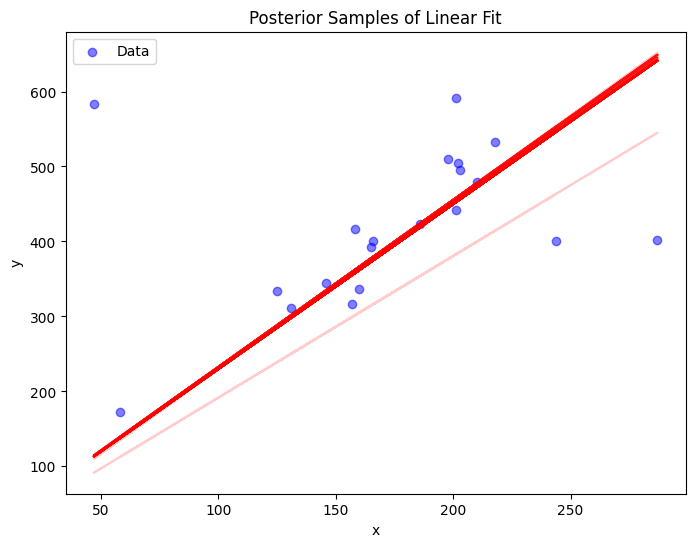

In [78]:
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Data', alpha=0.5)

for i in range(100):  
    m_sample, b_sample = samples[np.random.randint(len(samples))]
    plt.plot(x, build_model(m_sample, b_sample)(x), color='red', alpha=0.1)

plt.title('Posterior Samples of Linear Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

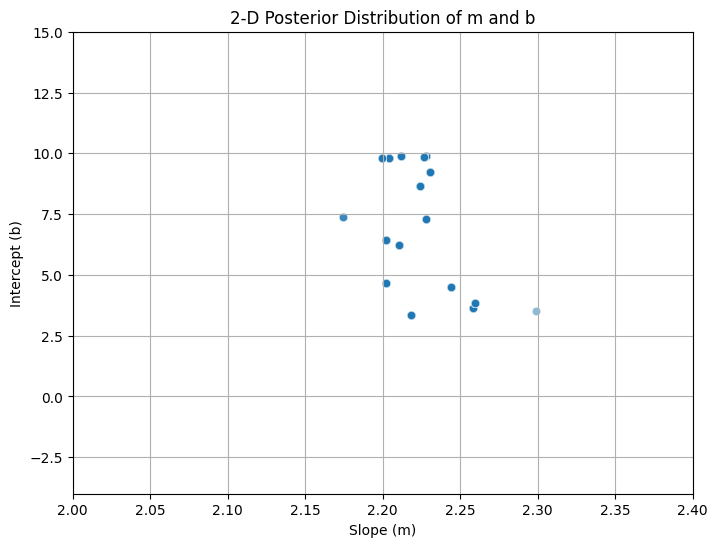

In [79]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=samples[:, 0], y=samples[:, 1], alpha=0.5)
plt.title('2-D Posterior Distribution of m and b')
plt.xlabel('Slope (m)')
plt.ylabel('Intercept (b)')
plt.xlim(2,2.4)
plt.ylim(-4,15)
plt.grid()
plt.show()

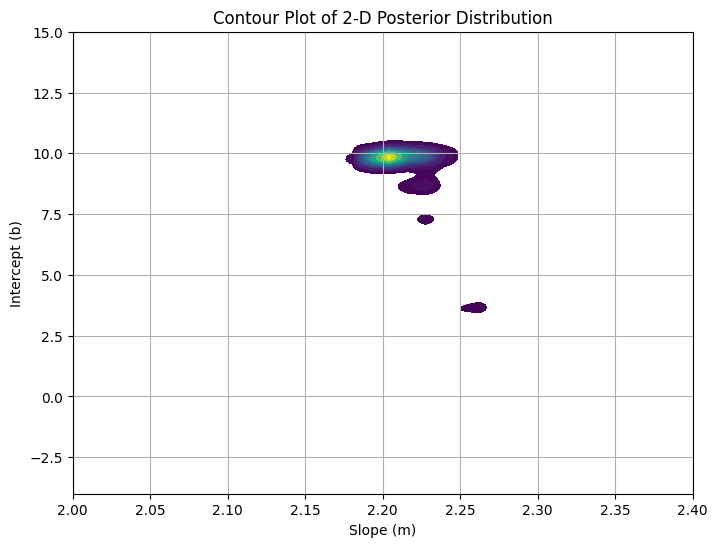

In [80]:
plt.figure(figsize=(8, 6))
sns.kdeplot(x=samples[:, 0], y=samples[:, 1], fill=True, cmap='viridis', levels=20)
plt.title('Contour Plot of 2-D Posterior Distribution')
plt.xlabel('Slope (m)')
plt.ylabel('Intercept (b)')
plt.xlim(2,2.4)
plt.ylim(-4,15)
plt.grid()
plt.show()

Q1.

In [84]:
df = pd.read_csv('../data/gaiadr3_solar_neighborhood.csv')
df

,mg,bp_rp,parallax
0,10.390250,2.731872,10.000008
1,8.608481,2.025819,10.000029
2,4.267759,0.880858,10.000032
3,10.506658,2.649735,10.000066
4,12.077941,2.940875,10.000111
...,...,...,...
227624,11.758283,2.834036,336.026602
227625,9.521769,2.215609,392.752945
227626,14.129570,4.184836,415.179416
227627,11.883816,2.833697,546.975940


In [85]:
filtered_data = df[df['parallax'] > 40]

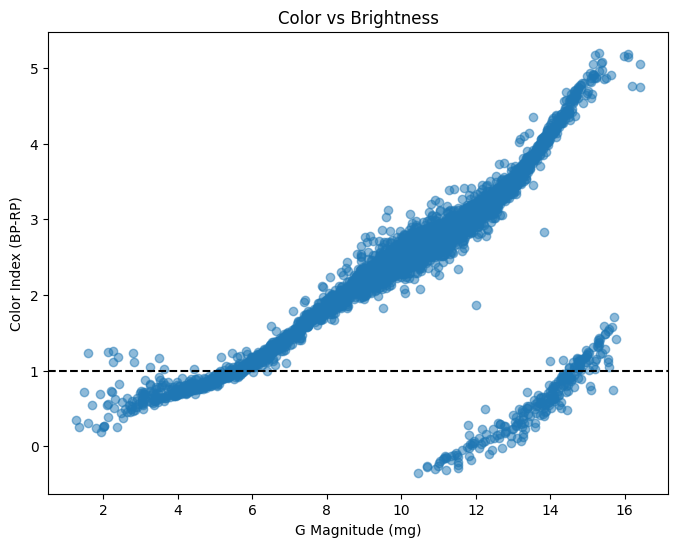

In [93]:
plt.figure(figsize=(8, 6))
plt.scatter(filtered_data['mg'], filtered_data['bp_rp'], alpha=0.5)  
plt.xlabel('G Magnitude (mg)')
plt.ylabel('Color Index (BP-RP)')
plt.title('Color vs Brightness')
plt.axhline(y=1, color='black', linestyle='--')
plt.show()

In [94]:
afterExclude_df = filtered_data[filtered_data['bp_rp'] > 1]  
print(afterExclude_df)

               mg     bp_rp    parallax
223559  11.544313  2.992254   40.002314
223560  13.563787  3.794676   40.004848
223561  10.197586  2.492932   40.007115
223562  12.769197  3.373776   40.014745
223563  12.413716  3.135756   40.019696
...           ...       ...         ...
227624  11.758283  2.834036  336.026602
227625   9.521769  2.215609  392.752945
227626  14.129570  4.184836  415.179416
227627  11.883816  2.833697  546.975940
227628  13.411743  3.804580  768.066539

[3549 rows x 3 columns]


Estimated Parameters:
Intercept (β0): 4.235507886898818
Slope (β1): 2.390520142522935
Standard Deviation (σ): 1.2042061825016164


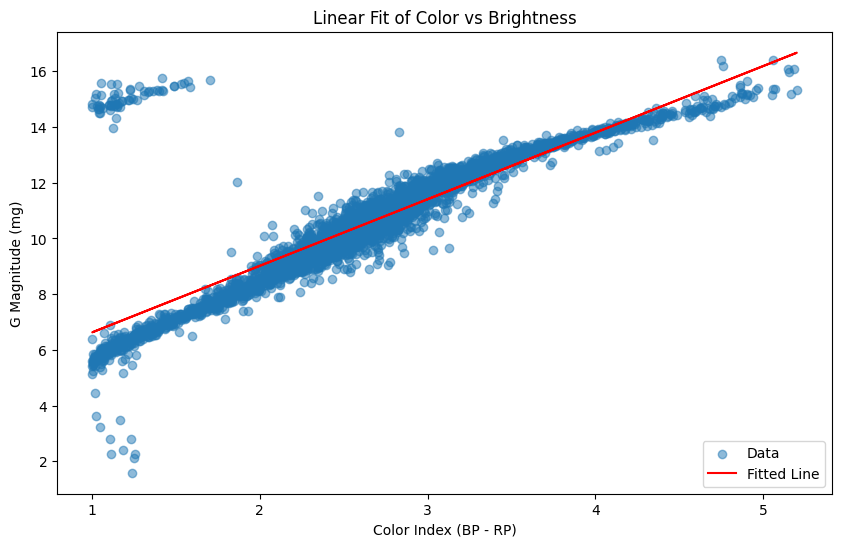

In [96]:
# Define the likelihood function
def negative_log_likelihood(params, x, y):
    beta_0, beta_1, sigma = params
    n = len(y)
    
    # Calculate the predicted values
    y_pred = beta_0 + beta_1 * x
    
    # Calculate the residuals
    residuals = y - y_pred
    
    # Log-likelihood
    if sigma <= 0:  # To ensure sigma is positive
        return np.inf
    
    log_likelihood = -0.5 * n * np.log(2 * np.pi * sigma**2) - (1 / (2 * sigma**2)) * np.sum(residuals**2)
    return -log_likelihood  # Return negative for minimization

# Prepare the data
x = afterExclude_df['bp_rp'].values
y = afterExclude_df['mg'].values

# Initial parameter guesses
initial_params = [0, 0, 1]  # beta_0, beta_1, sigma

# Minimize the negative log likelihood
result = minimize(negative_log_likelihood, initial_params, args=(x, y), bounds=[(None, None), (None, None), (1e-5, None)])

# Extract the estimated parameters
beta_0, beta_1, sigma = result.x
print(f"Estimated Parameters:\nIntercept (β0): {beta_0}\nSlope (β1): {beta_1}\nStandard Deviation (σ): {sigma}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, label='Data')
plt.plot(x, beta_0 + beta_1 * x, color='red', label='Fitted Line')
plt.xlabel('Color Index (BP - RP)')
plt.ylabel('G Magnitude (mg)')
plt.title('Linear Fit of Color vs Brightness')
plt.legend()
plt.show()


In [ ]:
# Bayesian linear regression model
with pm.Model() as model:
    # Priors
    beta_0 = pm.Uniform('beta_0', lower=-10, upper=10)  # Adjust bounds as necessary
    beta_1 = pm.Uniform('beta_1', lower=-5, upper=5)    # Adjust bounds as necessary
    sigma = pm.Normal('sigma', mu=5, sigma=2)  # Normal prior for the scatter

    # Likelihood
    y_pred = beta_0 + beta_1 * x
    likelihood = pm.Normal('y_obs', mu=y_pred, sigma=sigma, observed=y)

    # Inference
    trace = pm.sample(2000, return_inferencedata=False)

# Plotting the results
pm.traceplot(trace)
plt.show()

# Summary of the posterior
print(pm.summary(trace))


In [ ]:

# 3D Plot of the sampled parameters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extracting samples
beta_0_samples = trace['beta_0']
beta_1_samples = trace['beta_1']
sigma_samples = trace['sigma']

# Scatter plot in 3D
ax.scatter(beta_0_samples, beta_1_samples, sigma_samples, alpha=0.5, c='blue', marker='o')
ax.set_xlabel('Intercept (β0)')
ax.set_ylabel('Slope (β1)')
ax.set_zlabel('Scatter (σ)')
ax.set_title('3D MCMC Sampling of Parameters')
plt.show()

# Summary of the posterior
print(pm.summary(trace))
